## Regressão Linear para o pH

In [1]:
#!pip install statsmodels

In [3]:
import pandas as pd 
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [4]:
df_reservatorio = pd.read_csv('clorofila.csv')

In [5]:
df_reservatorio.head()

,Condutividade,DO,pH,ORP,Profundidade,Temperatura,Turbidez,Clorofila
0,121.73,8.32,7.47,198.04,0.37,20.55,6.98,59.97
1,121.29,5.67,6.90,231.30,0.40,19.98,4.65,30.59
2,120.77,5.33,6.79,229.20,0.42,19.61,3.94,17.06
3,119.50,7.61,7.10,228.61,0.41,19.47,5.20,38.00
4,121.17,7.96,7.12,208.77,0.39,19.73,4.76,24.39


In [7]:
#Variavel explicativa Ph
X = df_reservatorio['pH']
#Variavel resposta Clorofila
Y = df_reservatorio['Clorofila']

Por default, o Statsmodels ajusta uma reta que começa na origem, no ponto (0,0). Mas não queremos isso! Para ajustar a regressão vamos adicionar a seguinte linha de código

In [8]:
# seting BO
X= sm.add_constant(X)

O nome do processo de otimização pra achar o B0 e B1 se chama Ordinary Least Squares (Mínimos Quadrados Ordinais) - OLS.

In [9]:
modelo_linear_ph = sm.OLS(Y , X)

Agora iremos criar nosso modelo.

In [10]:
modelo_linear_ph = modelo_linear_ph.fit()

## Intervalo de Confiança para a média

Vamos construir o intervalo de confiança para a média, com 95% de confança

In [11]:
from statsmodels.stats.outliers_influence import summary_table

In [12]:
# summary table retoma um array com os intervalos de confiança
st , data , ss2 = summary_table(modelo_linear_ph , alpha = 0.05)

In [17]:
# valores ajustados
fitted_values = data[: , 2]
# intervalo para a média
predict_mean_ci_low , predict_mean_ci_upp = data[: , 4:6].T

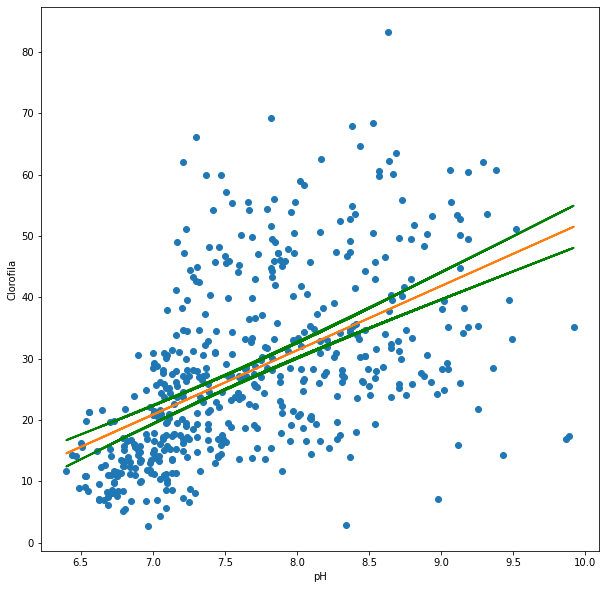

In [21]:
plt.figure(figsize=(10,10)) 

# Check we got the right things
plt.plot(df_reservatorio['pH'], df_reservatorio['Clorofila'], 'o')
plt.plot(df_reservatorio['pH'], fitted_values, '-', lw=2)
plt.plot(df_reservatorio['pH'], predict_mean_ci_low, 'g-', lw=2)
plt.plot(df_reservatorio['pH'], predict_mean_ci_upp, 'g-', lw=2)
plt.xlabel('pH')
plt.ylabel('Clorofila')
plt.show()

## Intervalo de Previsão

In [22]:
predict_ci_low , predict_ci_upp = data[: , 6:8].T

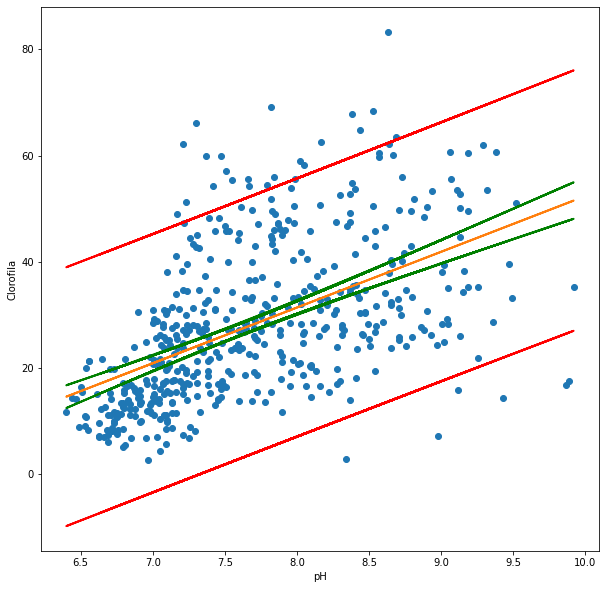

In [23]:
plt.figure(figsize=(10,10)) 

# Check we got the right things
plt.plot(df_reservatorio['pH'], df_reservatorio['Clorofila'], 'o')
plt.plot(df_reservatorio['pH'], fitted_values, '-', lw=2)
plt.plot(df_reservatorio['pH'], predict_ci_low, 'r-', lw=2)
plt.plot(df_reservatorio['pH'], predict_ci_upp, 'r-', lw=2)
plt.plot(df_reservatorio['pH'], predict_mean_ci_low, 'g-', lw=2)
plt.plot(df_reservatorio['pH'], predict_mean_ci_upp, 'g-', lw=2)
plt.xlabel('pH')
plt.ylabel('Clorofila')
plt.show()